# **Project Name**    - Google PlayStore Analysis



In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Sudip Kumar Bairagi


# **Project Summary -**

This project aims to perform an in-depth Exploratory Data Analysis (EDA) on the Google Play Store dataset to uncover actionable insights that can help app developers achieve success in the Android market.

The dataset contains valuable information about each app, including category, rating, size, installs, and more. Additionally, a dataset with customer reviews is available for sentiment analysis.

**Tasks**:
Data Acquisition and Preparation:

Load the Play Store and user review datasets.
Clean the data, handle missing values, and address inconsistencies.


**Univariate Analysis**:

Explore individual variables to understand their distributions and characteristics:
Analyze the distribution of app categories.
Examine the distribution of app ratings.
Investigate the distribution of app sizes.
Explore other relevant variables like price, installs, and reviews.

**Bivariate Analysis:**

Investigate relationships between pairs of variables:
Analyze the correlation between app ratings and the number of reviews.
Explore the relationship between app category and rating.
Examine the impact of app size on installs.
Investigate other relevant relationships.

**Multivariate Analysis:**

Explore complex interactions between multiple variables:
Analyze how app category, rating, and price influence installs.
Investigate the impact of user reviews on app ratings.
Perform other relevant multivariate analyses.
Sentiment Analysis (Optional):

Analyze the sentiment of user reviews to understand user satisfaction and identify areas for improvement.

**Data Visualization:**

Create meaningful visualizations (histograms, scatter plots, bar charts, etc.) to communicate insights effectively.

**Actionable Insights and Recommendations:**

Summarize key findings and provide actionable recommendations for app developers to improve their apps and marketing strategies.
This EDA project will empower app developers with data-driven insights to make informed decisions and increase their chances of success in the competitive Android app market.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The Google Play Store is a highly competitive marketplace with millions of apps vying for user attention. App developers need to understand the factors that contribute to app success to make informed decisions about development and marketing strategies.

The challenge is to leverage the available data to identify key factors that influence app popularity, user ratings, and overall success in the Android market.

#### **Business Objective**

What kind of Apps are most popular?

In order to have most Download what shall be the strategy?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [174]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [175]:
# Load Dataset
path_playstore_csv = '/content/drive/My Drive/Alma/EDA/DataSet/Play Store Data.csv'
path_user_review_csv = '/content/drive/My Drive/Alma/EDA/DataSet/User Reviews.csv'
df_playstore = pd.read_csv(path_playstore_csv)
df_user_review = pd.read_csv(path_user_review_csv)

### Dataset First View

In [176]:
# Dataset First Look
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [177]:
# Getting the data set info for Palystore to analyse Columns, Non-null, Dtype etc
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [178]:
# how many nulls are there in ratings
df_playstore.isnull().sum()


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


**483** duplicate values found

In [179]:
# High level Statistical view on numeric Rating column
df_playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Observation: most of the Ratings are aroud 4

# **Analyse and process User Review data**

In [180]:
  # first 5 rows
  df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [181]:
# Dataset Rows & Columns count
df_user_review.shape

(64295, 5)

### Dataset Information

In [182]:
# Dataset Info
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [183]:
# Dataset Duplicate Value Count
df_user_review.duplicated().sum()

33616

In [184]:
# remove duplicate rows from user_review
df_user_review.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [185]:
df_user_review.isnull().sum()

,0
App,0
Translated_Review,987
Sentiment,982
Sentiment_Polarity,982
Sentiment_Subjectivity,982


**Dropping the rows where Translated Review is NULL**

In [186]:
df_user_review.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [187]:
# List unique App count
df_user_review['App'].nunique()

1074

In [188]:
# 10 App which have most Positive Reviews
df_user_review[df_user_review['Sentiment'] == 'Positive'].groupby('App').size().sort_values(ascending=False).head(10)

,0
App,
ColorNote Notepad Notes,91
Calorie Counter - Macros,87
Family Locator - GPS Tracker,85
8fit Workouts & Meal Planner,82
Calorie Counter - MyNetDiary,82
Bible,80
10 Best Foods for You,79
Google Photos,76
Calorie Counter & Diet Tracker,75


In [189]:
# 10 app which have most negative reviews
df_user_review[df_user_review['Sentiment'] == 'Negative'].groupby('App').size().sort_values(ascending=False).head(10)

,0
App,
Facebook,59
Be A Legend: Soccer,59
Angry Birds Classic,59
Cooking Fever,57
Candy Crush Soda Saga,50
Gardenscapes,50
8 Ball Pool,46
Agar.io,44
Basketball Stars,41


In [190]:
# Top 10 App which received most reveiws
df_user_review.groupby('App').size().sort_values(ascending=False).head(10)

,0
App,
Facebook,131
Episode - Choose Your Story,125
Angry Birds Classic,108
Family Locator - GPS Tracker,106
Google Photos,102
8fit Workouts & Meal Planner,101
Calorie Counter - MyFitnessPal,101
ColorNote Notepad Notes,100
Calorie Counter - Macros,100


### What did you know about your dataset?


**Observations**:

Only Rating is numeric data type of Float

There are 10841 records in **Palystore**

Total columns: 12

Rating has Null values

Average rating is around : 3.6
Max rating : 19, this can be a Data Issue. It should be equal or below 5
75% percentile is 4.5 ratings


**User Review**

Null value columns : Translated_Review, Sentiment, Sentiment_Polarity and Sentiment_Subjectivity
64295 entries,

possibilities of large Duplicate values

*   "Everyone" content type has most "Free Type" usage
*    No "Paid" services for "Unrated" contents





## ***2. Understanding Your Variables***

In [191]:
# Dataset Columns
df_playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [192]:
# Dataset Describe
df_playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Check Unique Values for each variable.

In [193]:
# Check Unique Values for each variable.
df_playstore.nunique()

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


In [194]:
# Check Unique Values for each variable of user reviews
df_user_review.nunique()

,0
App,1074
Translated_Review,27994
Sentiment,3
Sentiment_Polarity,5410
Sentiment_Subjectivity,4474


## 3. ***Data Wrangling***

In [195]:
# duplicate values in playstore
df_playstore.duplicated().sum()

483

In [196]:
# convert all null ratings to 0
df_playstore['Rating'] = df_playstore['Rating'].fillna(0)

In [197]:
# remove duplicate values from playstore
df_playstore.drop_duplicates(inplace=True)

In [198]:
# test if all nulls of Ratings are replaced by zeros
df_playstore.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [199]:
# Transform all Ratings of above 5 to 5
df_playstore.loc[df_playstore['Rating'] > 5, 'Rating'] = 5


In [200]:
# drop rows where translated_review is null from user_review
df_user_review.dropna(subset=['Translated_Review'], inplace=True)
df_user_review.isnull().sum()
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [201]:
# Convert "Install" field to Integer
# remove "+" chracter from column "Download" of palystore table
df_playstore['Installs'] = df_playstore['Installs'].str.replace('+', '')
df_playstore['Installs']= df_playstore['Installs'].str.replace(',', '')
df_playstore['Installs']= df_playstore['Installs'].str.replace('Free', '0')

df_playstore['Installs'] = df_playstore['Installs'].astype(int)



In [202]:
# display rows where Install is more than 1
df_playstore[df_playstore['Installs'] > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### What all manipulations have you done and insights you found?

Duplicates rows are identified,

Duplcate rows are removed from user_reviews ,

Duplicate rows are removed from playstore,


Non values are replaced for Ratings and Translated_Reviews

Ratings values were more than 5.

These are identified and converted to 5

"Install" column is non-numeric and also has NaN values.
To understand relationships of number of downloads we need to convert it to Int


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

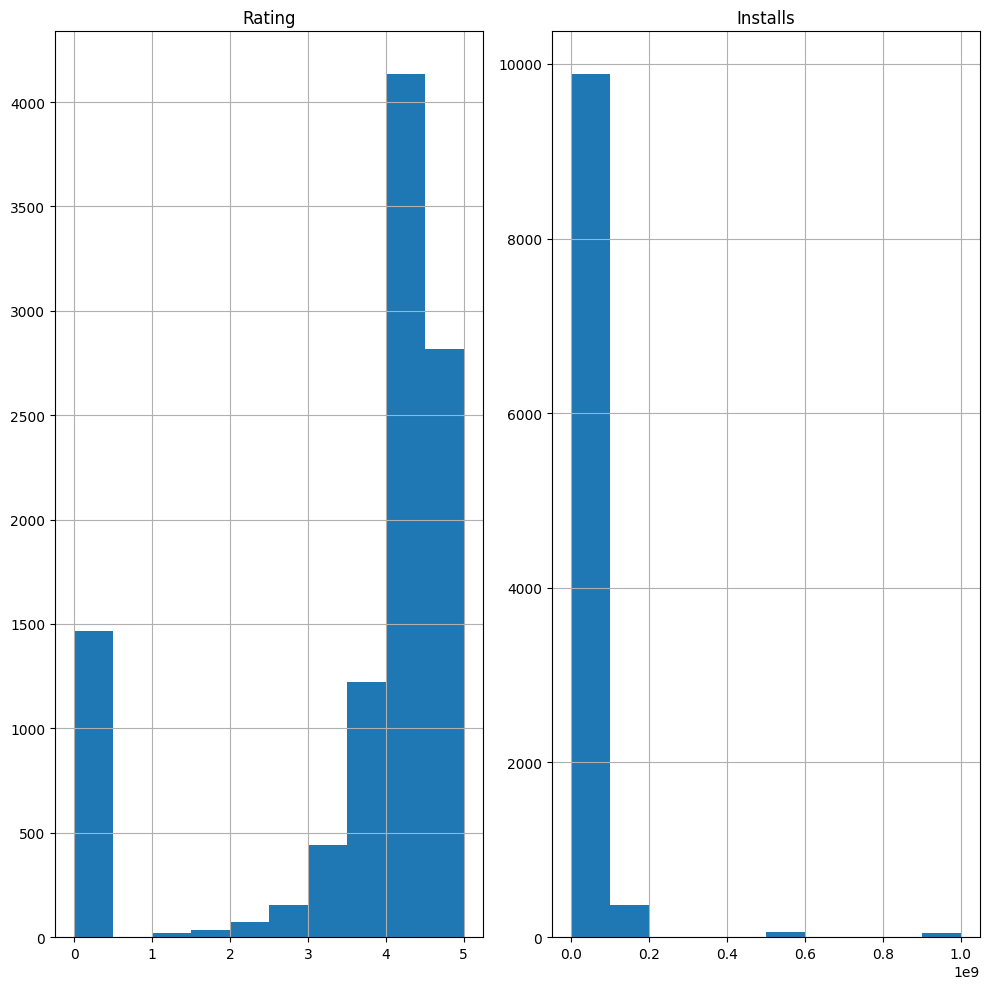

In [203]:
# Chart - 1 visualization code
# prompt: Using dataframe df_playstore: univariate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical columns
df_playstore.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Univariate analysis for categorical columns
for col in df_playstore.select_dtypes(include='category'):
    plt.figure()
    df_playstore[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart is used for Univariate Anlaysis

##### 2. What is/are the insight(s) found from the chart?

Most "Ratings" are around 4.

Very few Ratings are of 1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Apps on Average gets 3-4 Ratings which is positive
But few Apps get Zero Ratings as well

#### Chart - 2

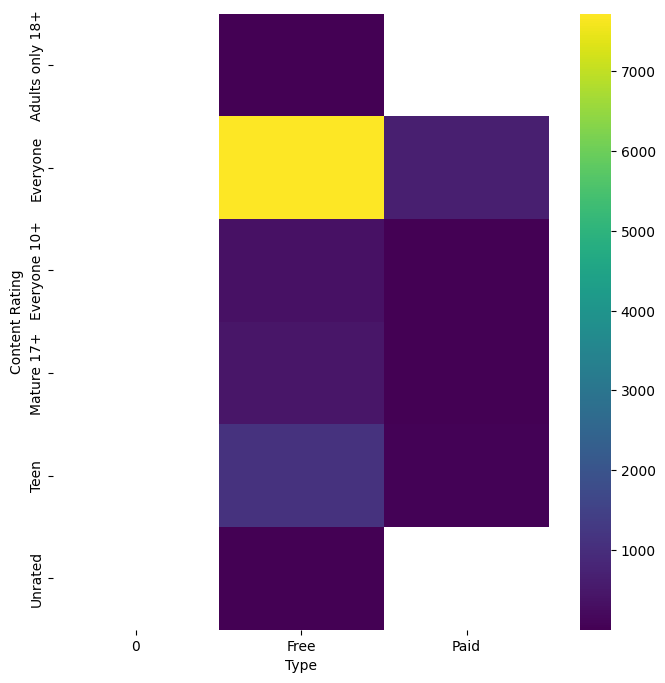

In [204]:
# Chart - 2 visualization code
# @title Type vs Content Rating
# generating Heat Map for better relationshp visualization

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Content Rating'].value_counts()
    for x_label, grp in df_playstore.groupby('Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Type')
_ = plt.ylabel('Content Rating')

##### 1. Why did you pick the specific chart?

I have used Histogram to show relationship as well as count of different "Types" of App.

Content Rating vs Types

##### 2. What is/are the insight(s) found from the chart?

There is no "Paid" subscription for "Unrated" Apps.

Content Rating "Everyone" has the most downloads

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We get very good insight from this.

In order to get "Paid" subscription it is mandatory to have the App "Content Rating".

Apps which has content for "Everyone" will get more downloads.

#### Chart - 3

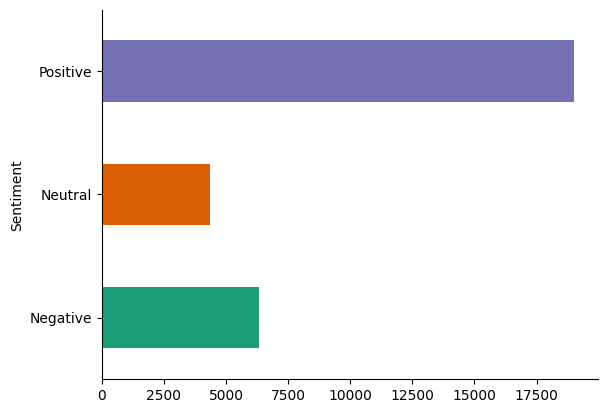

In [205]:
# Chart - 3 visualization code
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_user_review.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

Seaborn Bar chat is usefull here to analysis different Sentiments

##### 2. What is/are the insight(s) found from the chart?

There are three categories of Sentiments : Positive, Negative and Neutral

Positive sentiments are the highest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the cases users prefers to take side either "positive" or "negative"
There are "neutral" sentiments which are less

#### Chart - 4

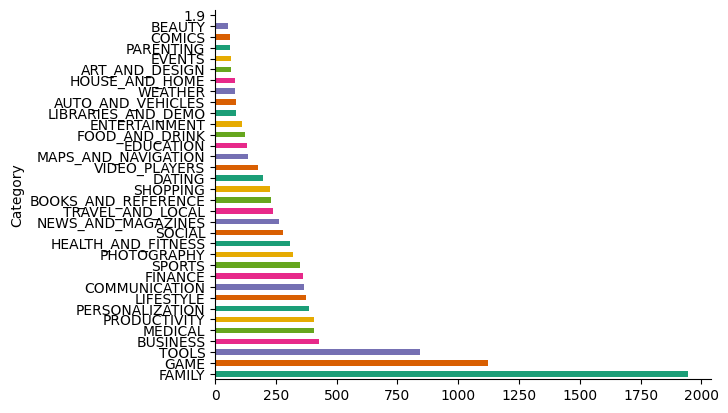

In [206]:
# Chart - 4 visualization code
# Create a new table joining User_reviews with playstore on app columns

df_user_review_playstore = df_user_review.merge(df_playstore[['App', 'Category', 'Rating', 'Installs', 'Size', 'Price', 'Genres']], on='App')

# plot Category and Installs
df_playstore.groupby('Category').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



##### 1. Why did you pick the specific chart?

**Horizontal Bar Charts** is selected to analyses Downloads per Category

##### 2. What is/are the insight(s) found from the chart?

**Family**  category apps are mostly downloaded followed by "Games"

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

"Games" and "Family" apps are more popular. Business should put prorities in these categories

#### Chart - 5

In [207]:

df_user_review_playstore['Price']= df_user_review_playstore['Price'].str.replace('$', '')
df_user_review_playstore['Price']= df_user_review_playstore['Price'].str.replace('Everyone', '0')
df_user_review_playstore['Price'] = df_user_review_playstore['Price'].astype(float)



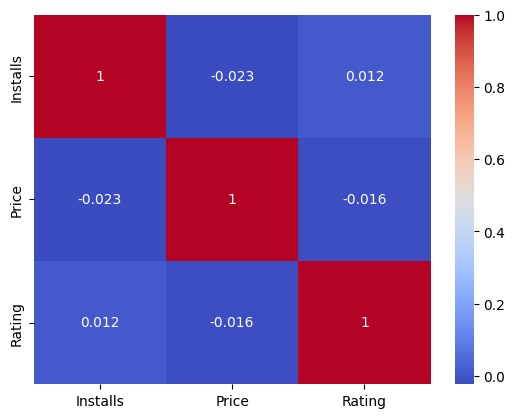

In [208]:
# generate seaborn plot showing Installs, Price and Ratings in a heatmap from df_user_review_playstore
corr = df_user_review_playstore[['Installs', 'Price', 'Rating']].corr()

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()







##### 1. Why did you pick the specific chart?

Correlation Heatmap is choosen to see the relations between variables

##### 2. What is/are the insight(s) found from the chart?

There is a "'Positive" correlation between Installs and Ratings of the APP.

But, no "Price" and "Installs" are in negative correlation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highly "Priced" app may get less "Downloads"
Highly "rated" apps are downloaded the most.

#### Chart - 6

In [209]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [210]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [211]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [212]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [213]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [214]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [215]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [216]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [217]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [218]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
After analysing the playstore and user reviews data I suggest the followings

1. Do not launch any APP which is "Unrated". It may not get any "Paid" subscription
2. "Family" and "Games" are the two most popular APP category. Thus creating applications in these categories are advisible
3. User like to go for "Paid" app when "Rating" is high
4. User prefers to install APPS which are highly rated but not "Paid". So Application should have features which gets high ratings.

# **Conclusion**

By doing in-depth analysis of the data we get better insights of the applications. Sentiment analysis could be further analysied to get the Voice Of Customer.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***